In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('opioid-prescribers.csv')
df.head()

,State,NPI,Gender,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,Death.Incidence.Rank,State.Incidence
0,AK,1265436752,F,"ANP,BC",Nurse Practitioner,0,0,0,0,0,...,0,0,0,0,0,81,12,0,22,Average
1,AK,1871557645,F,MD,Family Practice,0,0,0,12,0,...,0,0,0,0,0,0,0,1,22,Average
2,AK,1770514523,M,MD,Orthopedic Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,1,22,Average
3,AK,1184921314,F,PA-C,Physician Assistant,0,0,0,0,0,...,0,0,0,0,0,0,0,0,22,Average
4,AK,1912178526,F,M.D.,Family Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,1,22,Average


In [3]:
df.shape

(24680, 258)

In [4]:
df['Credentials'].value_counts()

MD            6945
M.D.          6623
DDS           1142
D.O.           866
PA-C           841
              ... 
ANP/CNP          1
C.N.P            1
FNP - C          1
MS, ANP-C        1
D.D.S., PC       1
Name: Credentials, Length: 880, dtype: int64

In [5]:
df['Specialty'].value_counts()

Internal Medicine            3146
Family Practice              2965
Dentist                      2770
Nurse Practitioner           2505
Physician Assistant          1835
                             ... 
Chiropractic                    1
Clinical Pharmacology           1
Pharmacy Technician             1
Behavioral Analyst              1
Unknown Supplier/Provider       1
Name: Specialty, Length: 108, dtype: int64

In [6]:
df.drop('NPI', axis=1, inplace=True)
df.drop('Credentials', axis=1, inplace=True)
df.drop('Death.Incidence.Rank', axis=1, inplace=True)

In [7]:
df.shape

(24680, 255)

In [8]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed

In [9]:
X = df.drop('State.Incidence', axis=1)
y = df[['State.Incidence']]


label_encode(X, ['State','Gender','Specialty'])
label_encode(y, ['State.Incidence'])


/Users/dmitriyb/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

for depth in range(101, 102):
    model = RandomForestClassifier(random_state=1, max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Depth: " + str(depth) + ": " + str(metrics.accuracy_score(y_test, y_pred)))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dmitriyb/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Depth: 101: 0.7856564019448946


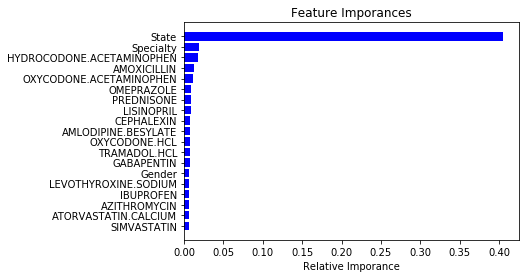

In [31]:
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-19:]
plt.title('Feature Imporances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Imporance')
plt.show()

In [ ]:
from sklearn import svm

# instantiate model
model = svm.SVC() 


# fit model
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

In [32]:
df.head()

,State,Gender,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,...,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,State.Incidence
0,AK,F,Nurse Practitioner,0,0,0,0,0,0,0,...,0,0,0,0,0,0,81,12,0,Average
1,AK,F,Family Practice,0,0,0,12,0,0,0,...,0,0,0,0,0,0,0,0,1,Average
2,AK,M,Orthopedic Surgery,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Average
3,AK,F,Physician Assistant,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Average
4,AK,F,Family Practice,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Average


In [37]:
df2 = df.drop(['State','Specialty','Gender','Opioid.Prescriber','State.Incidence'], axis=1)

In [38]:
from sklearn.cluster import KMeans

In [39]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2)
labels = kmeans.predict(df2)
print(labels)

[0 0 0 ... 0 0 1]


In [40]:
df3 = pd.concat([df.reset_index(), pd.Series(labels)], axis=1)
df3.head(10)

,index,State,Gender,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,State.Incidence,0
0,0,AK,F,Nurse Practitioner,0,0,0,0,0,0,...,0,0,0,0,0,81,12,0,Average,0
1,1,AK,F,Family Practice,0,0,0,12,0,0,...,0,0,0,0,0,0,0,1,Average,0
2,2,AK,M,Orthopedic Surgery,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Average,0
3,3,AK,F,Physician Assistant,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Average,0
4,4,AK,F,Family Practice,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Average,0
5,5,AK,F,Physician Assistant,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Average,0
6,6,AK,F,Physician Assistant,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Average,0
7,7,AK,F,Nurse Practitioner,0,0,0,0,0,0,...,0,0,0,0,0,0,11,1,Average,0
8,8,AK,M,Physician Assistant,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Average,0
9,9,AK,F,Dermatology,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Average,0


In [43]:
df3[['State.Incidence', 0]]

,State.Incidence,0
0,Average,0
1,Average,0
2,Average,0
3,Average,0
4,Average,0
...,...,...
24675,Average,0
24676,Average,0
24677,Average,0
24678,Average,0


In [44]:
df3['State.Incidence'].value_counts()

Average    11306
Low         8248
High        5126
Name: State.Incidence, dtype: int64